## Credit Card Fraud Detection
Done By Abduallah Abuhassan

## Import Libraries

In [37]:
import pandas as pd
from ydata_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import average_precision_score
import pickle

In [5]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
# Class is highly imbalanced (98.2%)

## EDA

In [10]:
# Check for missing values, duplicates, and statistical distributions.
# Visualize the class imbalance.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
data = data.drop_duplicates()

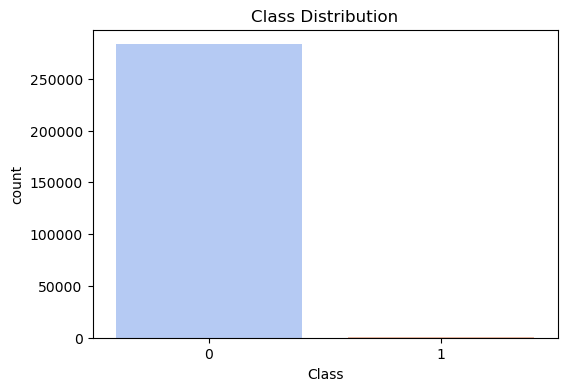

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data, palette='coolwarm')
plt.title('Class Distribution')
plt.show()

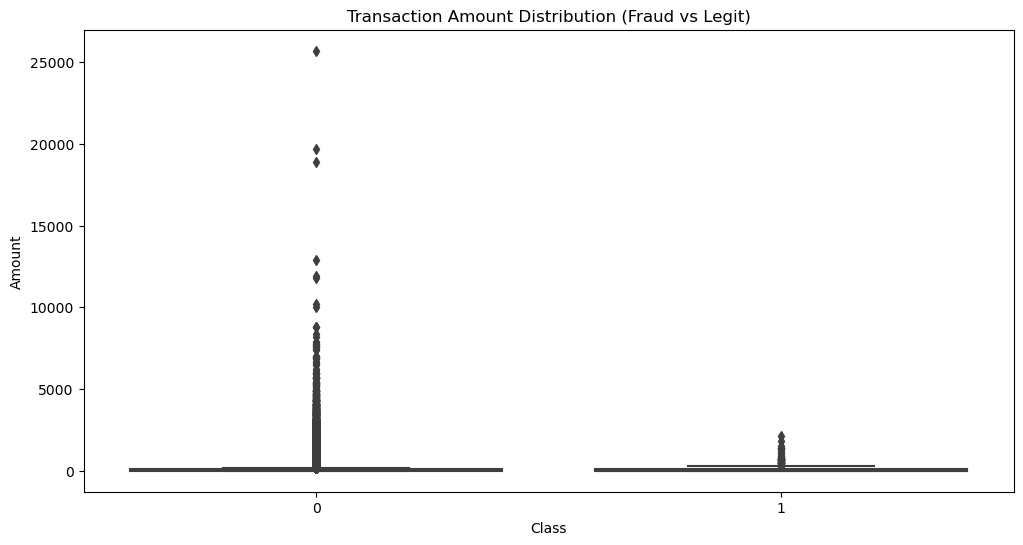

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data["Class"], y=data["Amount"])
plt.title("Transaction Amount Distribution (Fraud vs Legit)")
plt.show()

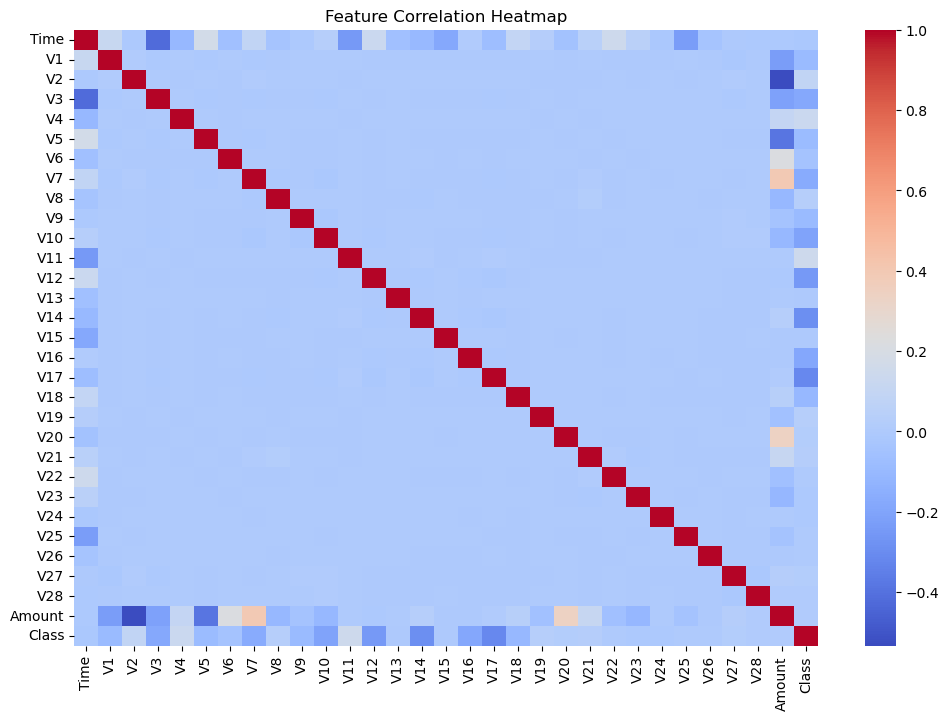

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas.

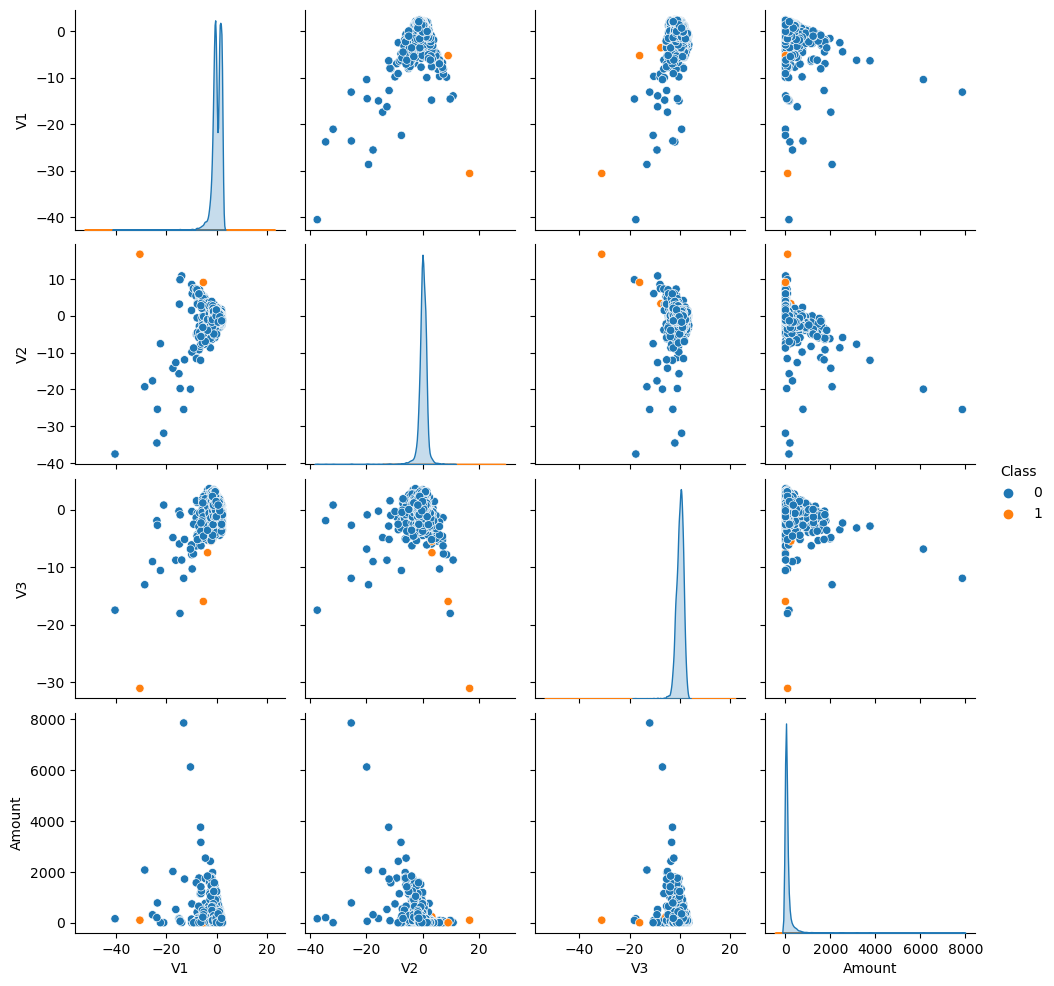

In [16]:
import seaborn as sns

# Sample data for better performance
df_sample = data.sample(5000, random_state=42)

sns.pairplot(df_sample, hue="Class", vars=['V1', 'V2', 'V3', 'Amount'])
plt.show()


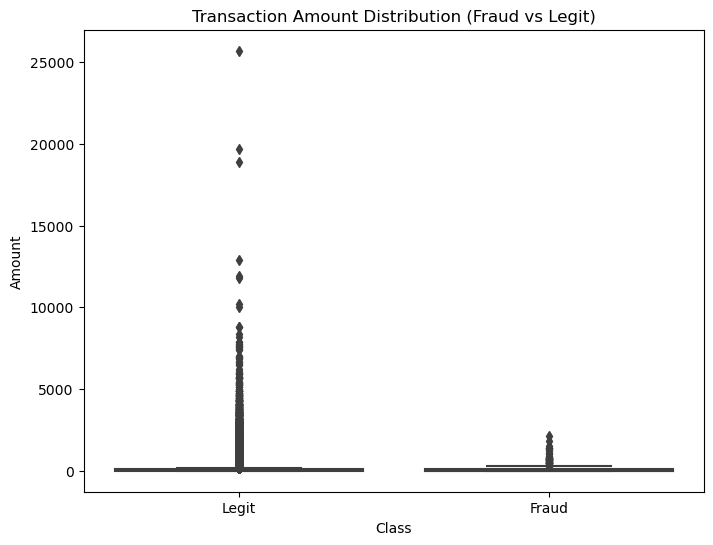

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["Class"], y=data["Amount"])
plt.title("Transaction Amount Distribution (Fraud vs Legit)")
plt.xticks([0, 1], ["Legit", "Fraud"])
plt.show()


## Balance Data

In [18]:
X = data.drop('Class', axis=1)
y = data['Class']

In [19]:
# Balance Data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [20]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, shuffle =True)

## Build Model

In [21]:
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42) 
GBCModel.fit(X_train, y_train)

#Calculating Prediction
y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)

In [22]:
PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Recall Score is : ', PrecisionRecallScore)

Precision Recall Score is :  (0.9863550511023635, 0.9863550511023635, 0.9863550511023635, None)


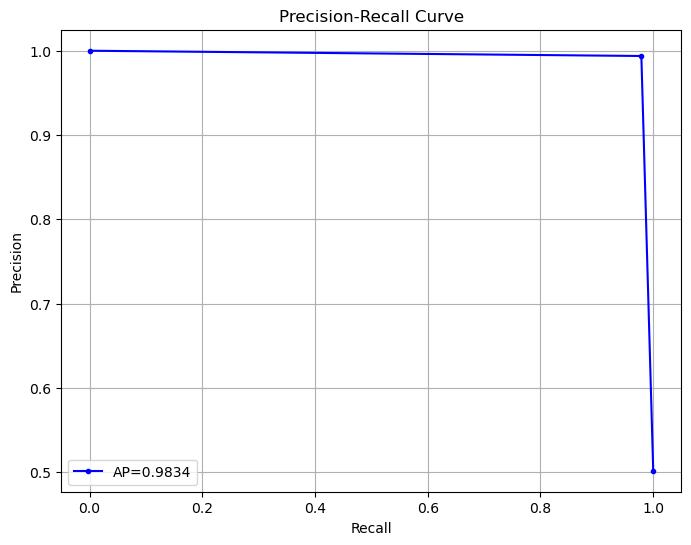

In [28]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Plot PR Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AP={average_precision:.4f}', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

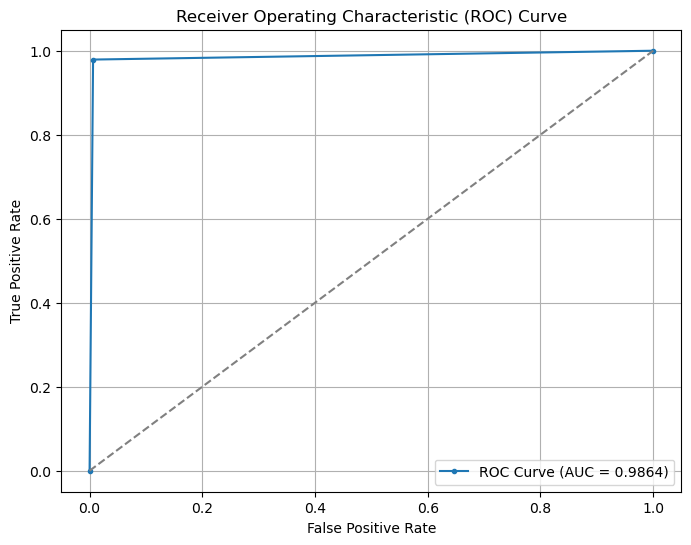

In [35]:
# Get false positive rate, true positive rate, and thresholds
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label="ROC Curve (AUC = {:.4f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

## Save Model

In [39]:
# Save Model for later
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(GBCModel, file)

In [40]:
# load model for testing
with open('xgboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

## Source
Data: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud